<a href="https://colab.research.google.com/github/Prakharprasun/NewNewsApp/blob/main/MLPP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [89]:
!pip install quandl
import quandl

In [91]:
data= quandl.get("NSE/TATAGLOBAL")

In [92]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


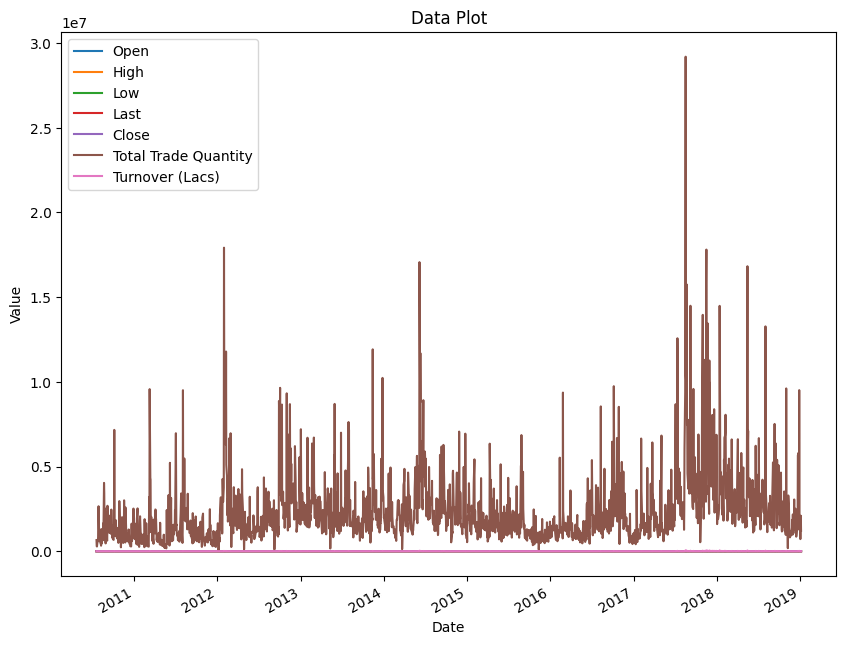

In [93]:
data.plot(figsize=(10, 8))
plt.title("Data Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [94]:
data['sma_50']= data['Close'].rolling(window=50).mean()
data['sma_200']= data['Close'].rolling(window=200).mean()

In [95]:
df=pd.DataFrame(data.values)
df.columns=data.columns

In [96]:
df=df.dropna()
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),sma_50,sma_200
199,97.90,98.55,96.60,97.55,97.55,391145.0,381.31,98.592,111.42800
200,98.15,99.05,96.60,97.90,97.70,319107.0,312.19,98.618,111.30875
201,98.00,101.45,97.25,99.95,99.80,636338.0,635.71,98.708,111.20325
202,100.55,101.40,100.05,101.00,100.75,544025.0,548.29,98.975,111.10375
203,100.80,103.30,97.20,98.40,97.95,976743.0,983.55,99.162,111.00550
...,...,...,...,...,...,...,...,...,...
2095,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09,216.410,245.38400
2096,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63,216.170,245.13775
2097,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31,215.918,244.83050
2098,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50,215.654,244.48975


In [97]:
y=df['Close']

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [100]:
X=df.drop('Close',axis=1)

In [101]:
X

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),sma_50,sma_200
199,97.90,98.55,96.60,97.55,391145.0,381.31,98.592,111.42800
200,98.15,99.05,96.60,97.90,319107.0,312.19,98.618,111.30875
201,98.00,101.45,97.25,99.95,636338.0,635.71,98.708,111.20325
202,100.55,101.40,100.05,101.00,544025.0,548.29,98.975,111.10375
203,100.80,103.30,97.20,98.40,976743.0,983.55,99.162,111.00550
...,...,...,...,...,...,...,...,...
2095,222.00,223.65,218.85,219.55,965858.0,2131.09,216.410,245.38400
2096,219.95,221.05,218.05,218.95,716275.0,1571.63,216.170,245.13775
2097,219.00,220.35,213.60,214.20,1081778.0,2340.31,215.918,244.83050
2098,214.95,215.35,209.90,210.55,2096553.0,4433.50,215.654,244.48975


In [102]:
y

199      97.55
200      97.70
201      99.80
202     100.75
203      97.95
         ...  
2095    219.40
2096    219.10
2097    214.60
2098    210.05
2099    213.80
Name: Close, Length: 1901, dtype: float64

In [103]:
X.shape

(1901, 8)

In [104]:
y.shape

(1901,)

In [105]:
X_train,y_train=X[1500:],y[1500:]
X_val,y_val=X[1500:1700],y[1500:1700]
X_test,y_test=X[1700:],y[1700:]

In [77]:
model=Sequential([layers.Input((8,1)),
                  layers.LSTM(64),
                  layers.Dense(32),
                  layers.Dense(32),
                  layers.Dense(1)])

In [78]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics='mean_absolute_error')

In [79]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50)

Epoch 1/50
13/13 [==============================] - 4s 87ms/step - loss: 55983.5508 - mean_absolute_error: 232.4884 - val_loss: 52382.8047 - val_mean_absolute_error: 221.9967
Epoch 2/50
13/13 [==============================] - 0s 15ms/step - loss: 54053.0039 - mean_absolute_error: 228.2803 - val_loss: 50031.4609 - val_mean_absolute_error: 216.6196
Epoch 3/50
13/13 [==============================] - 0s 20ms/step - loss: 50902.1797 - mean_absolute_error: 221.2451 - val_loss: 45636.5391 - val_mean_absolute_error: 206.1021
Epoch 4/50
13/13 [==============================] - 0s 17ms/step - loss: 44544.5781 - mean_absolute_error: 206.2483 - val_loss: 37442.0117 - val_mean_absolute_error: 185.1670
Epoch 5/50
13/13 [==============================] - 0s 18ms/step - loss: 34920.3359 - mean_absolute_error: 181.3458 - val_loss: 26870.6973 - val_mean_absolute_error: 153.7059
Epoch 6/50
13/13 [==============================] - 0s 19ms/step - loss: 22544.8398 - mean_absolute_error: 142.2912 - val_los

13/13 [==============================] - 0s 3ms/step


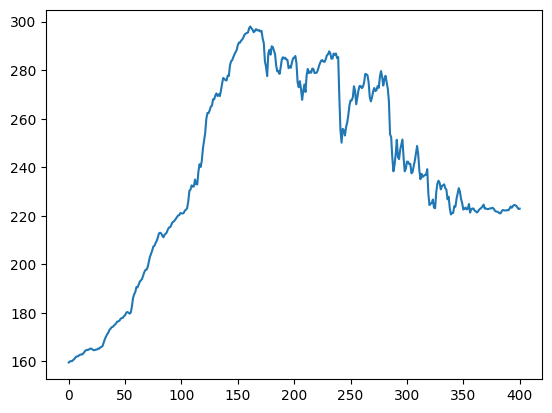

In [80]:
training_predict=model.predict(X_train)
plt.plot(training_predict)

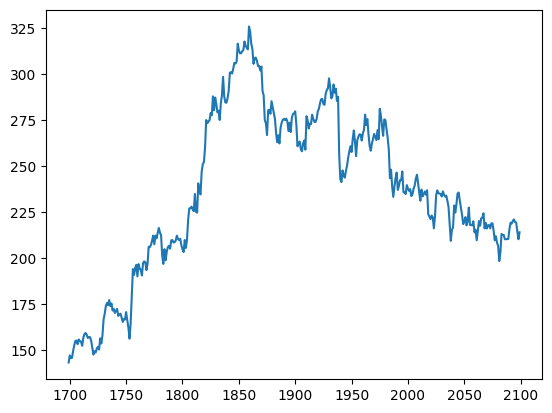

In [81]:
plt.plot(y_train)

In [82]:
model.evaluate(X_train)

13/13 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00


[0.0, 0.0]

7/7 [==============================] - 0s 3ms/step


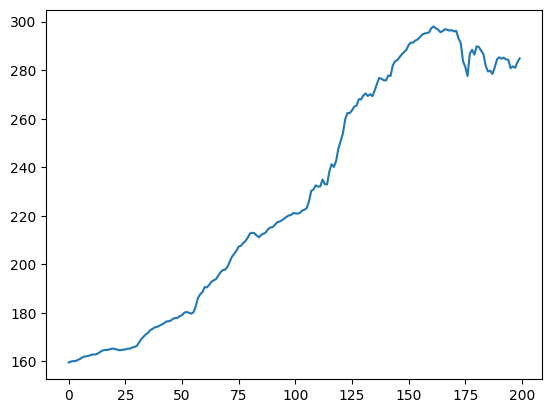

In [83]:
val_predict=model.predict(X_val)
plt.plot(val_predict)

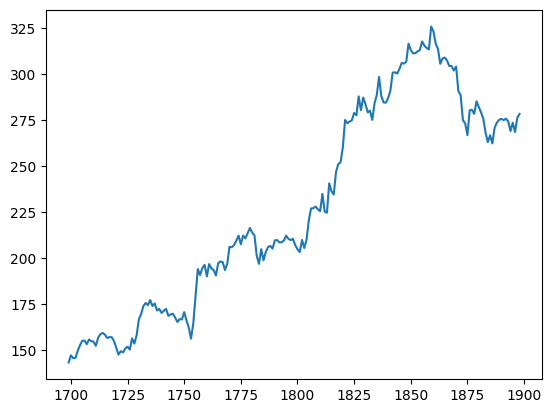

In [84]:
plt.plot(y_val)

7/7 [==============================] - 0s 3ms/step


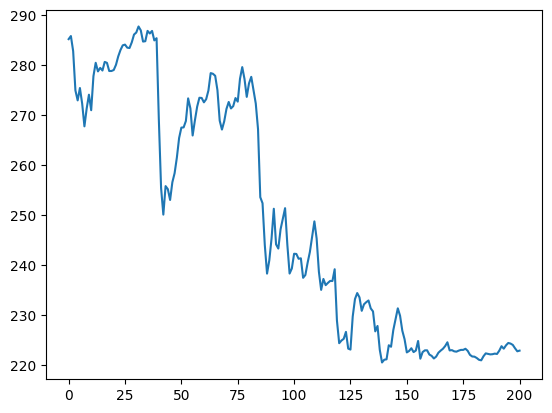

In [85]:
test_predict=model.predict(X_test)
plt.plot(test_predict)

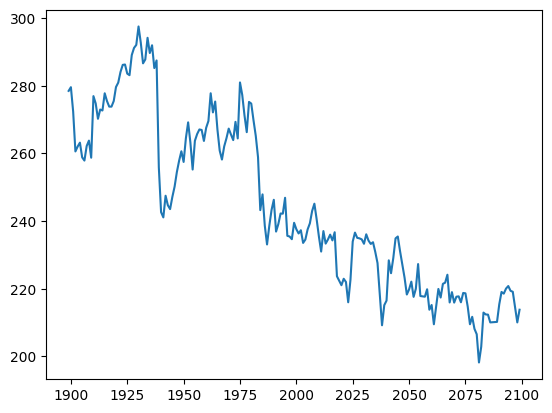

In [86]:
plt.plot(y_test)

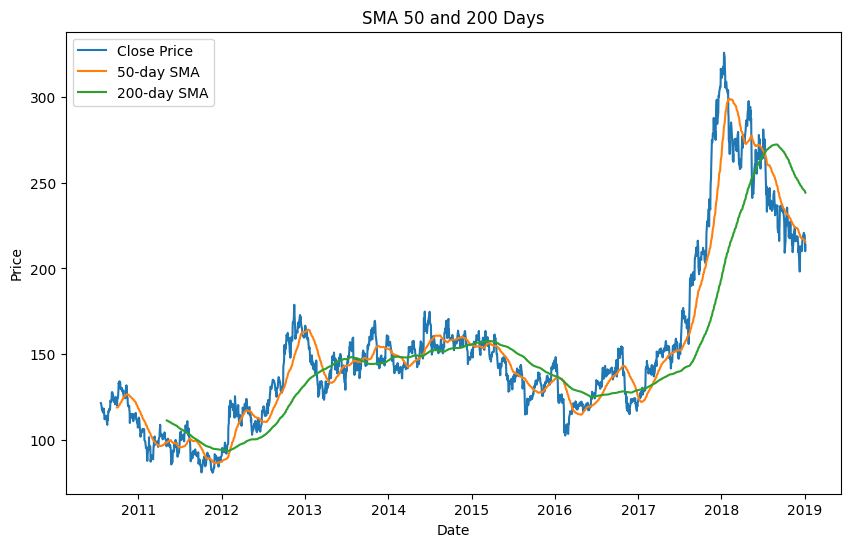

In [87]:
sma_50 = data['Close'].rolling(window=50).mean()
sma_200 = data['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(sma_50, label='50-day SMA')
plt.plot(sma_200, label='200-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SMA 50 and 200 Days')
plt.legend()
plt.show()